# Feature Engineering

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,yr_sold,yr_since_renovation,yr_since_built,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,2014,59.0,59,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,2014,23.0,63,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2015,82.0,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,2014,49.0,49,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2015,28.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346,2014,5.0,5,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362,2015,1.0,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299,2014,5.0,5,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0.0,98027,47.5345,-122.069,2015,11.0,11,0


Checking that all data is numerical with no nan values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id                     21597 non-null int64
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             21597 non-null float64
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_basement          21597 non-null float64
yr_built               21597 non-null int64
yr_renovated           21597 non-null float64
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
yr_sold                21597 non-null int64
yr_since_renovation    21597 non-null float64
yr_since_built         21597 non-null int64
renovated              21597 non-null

In [4]:
df.isna().sum()

id                     0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
condition              0
grade                  0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
yr_sold                0
yr_since_renovation    0
yr_since_built         0
renovated              0
dtype: int64

One hot encoding/creating dummy variables for categorical data. Datatypes need to be cast to string for pandas get_dummies to work.

In [5]:
categoricals = ['floors', 'condition', 'grade', 'zipcode']
df = df.astype({col: 'str' for col in categoricals})

In [6]:
df = pd.get_dummies(df, drop_first=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,0.0,0.0,1955,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,0.0,400.0,1951,1991.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,0.0,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,0.0,910.0,1965,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,0.0,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,0.0,0.0,2009,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,0.0,0.0,2014,0.0,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,0.0,0.0,2009,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,0.0,0.0,2004,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 104 entries, id to zipcode_98199
dtypes: float64(8), int64(8), uint8(88)
memory usage: 4.4 MB


In [8]:
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
subs = [(' ', '_'),('.',''),(',',''),("'",""),('™', ''), ('®',''),('+','plus'), ('½','half'), ('-','_')]
df.columns = [col_formatting(col) for col in df.columns]

# Train-Test Split

In [9]:
from statsmodels.formula.api import ols
'''from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [10]:
train, test = train_test_split(df, random_state=7)

In [11]:
train

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
15200,3876500290,175000.0,3,1.00,1070,6164,0.0,0.0,1967,0.0,...,0,0,0,0,0,0,0,0,0,0
20737,3630200520,775000.0,4,2.50,2580,5787,0.0,0.0,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
19361,8079010220,440000.0,4,2.50,2350,7203,0.0,0.0,1989,0.0,...,0,0,0,0,0,0,0,0,0,0
15578,5093300280,1680000.0,5,5.25,4830,18707,0.0,900.0,1952,1998.0,...,0,0,0,0,0,0,0,0,0,0
8436,125069038,2140000.0,4,3.75,5150,453895,0.0,790.0,1997,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,7524000030,250000.0,3,2.00,1440,9220,0.0,0.0,1965,0.0,...,0,0,0,0,0,0,0,0,1,0
20691,603000926,380000.0,5,3.50,2420,4670,0.0,0.0,2013,0.0,...,0,0,0,0,0,0,0,0,0,0
5699,1446800660,276500.0,4,1.75,1400,6650,0.0,0.0,1942,0.0,...,0,0,0,0,1,0,0,0,0,0
10742,4400900030,440000.0,4,2.75,2340,11034,0.0,620.0,1967,0.0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
test

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5460,3905081350,560000.0,4,2.75,1950,6192,0.0,0.0,1992,0.0,...,0,0,0,0,0,0,0,0,0,0
7131,6713700250,500000.0,5,3.00,2920,11440,0.0,0.0,2003,0.0,...,0,0,0,0,0,0,0,0,0,0
8759,3363900155,470000.0,2,1.00,1220,4000,0.0,0.0,1908,0.0,...,0,0,0,0,0,0,0,0,0,0
14957,4217400680,1020000.0,4,3.00,2720,4800,0.0,930.0,1928,0.0,...,0,0,0,0,0,0,0,0,0,0
5431,7301300050,375000.0,3,2.50,1930,6180,0.0,600.0,1961,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,1266200140,1850000.0,4,3.25,4160,10335,0.0,0.0,2014,0.0,...,0,0,0,0,0,0,0,0,0,0
7714,3333000775,249900.0,3,1.00,1100,5000,0.0,0.0,1960,0.0,...,0,0,0,0,0,0,0,0,0,0
2480,4459800070,679000.0,4,1.50,1420,4923,0.0,0.0,1928,0.0,...,0,0,0,0,0,0,0,0,0,0
16033,7212680080,300000.0,3,1.75,1700,8481,0.0,0.0,1993,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

# Baseline Model

In [14]:
predictors = '+'.join(df.columns[2:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     730.0
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:46:46   Log-Likelihood:            -2.1678e+05
No. Observations:               16197   AIC:                         4.338e+05
Df Residuals:                   16095   BIC:                         4.345e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.703e+07   8.78e+06    -11.047      0.000   -1.14e+08   -7.98e+07
bedrooms            -1.578e+04   1757.584     -8.979      0.000   -1.92e+04   -1.23e+04
bathrooms            2.526e+04   3003.631      8.410      0.000    1.94e+04    3.11e+04
sqft_living           179.5396      3.341     53.732      0.000     172.990     186.089
sqft_lot                0.1756      0.036      4.846      0.000       0.105       0.247
waterfront           8.221e+05   1.58e+04     51.979      0.000    7.91e+05    8.53e+05
sqft_basement         -40.8133      4.160     -9.810      0.000     -48.968     -32.658
yr_built             9961.9354    894.649     11.135      0.000    8208.324    1.17e+04
yr_renovated         2740.6516    468.765      5.847      0.000    1821.819    3659.484
lat                  1.672e+05    7.2e+04      2.321      0.020     2.6e+04    3.08e+05
long                 -2.29e+05   5.15e+04     -4.448      0.000    -3.3e+05   -1.28e+05
yr_sold              2.041e+04   1780.689     11.463      0.000    1.69e+04    2.39e+04
yr_since_renovation    38.0446    320.548      0.119      0.906    -590.265     666.354
yr_since_built       1.045e+04    914.057     11.432      0.000    8658.003    1.22e+04
renovated           -5.404e+06   9.28e+05     -5.823      0.000   -7.22e+06   -3.58e+06
floors_15           -1.053e+04   5003.847     -2.104      0.035   -2.03e+04    -720.145
floors_20           -2.925e+04   4211.716     -6.945      0.000   -3.75e+04    -2.1e+04
floors_25            3.273e+04   1.57e+04      2.089      0.037    2024.261    6.34e+04
floors_30           -6.063e+04   9464.315     -6.406      0.000   -7.92e+04   -4.21e+04
floors_35           -6034.5935   6.48e+04     -0.093      0.926   -1.33e+05    1.21e+05
condition_2          8.145e+04   3.99e+04      2.041      0.041    3231.439     1.6e+05
condition_3          9.346e+04   3.76e+04      2.486      0.013    1.98e+04    1.67e+05
condition_4          1.204e+05   3.76e+04      3.201      0.001    4.67e+04    1.94e+05
condition_5           1.58e+05   3.78e+04      4.181      0.000    8.39e+04    2.32e+05
grade_11             2.032e+05   1.08e+04     18.888      0.000    1.82e+05    2.24e+05
grade_12             6.403e+05   2.09e+04     30.668      0.000    5.99e+05    6.81e+05
grade_13             1.814e+06   5.18e+04     35.033      0.000    1.71e+06    1.92e+06
grade_3             -1.363e+05   1.59e+05     -0.860      0.390   -4.47e+05    1.74e+05
grade_4             -2.074e+05    3.6e+04     -5.761      0.000   -2.78e+05   -1.37e+05
grade_5              -2.46e+05   1.56e+04    -15.804      0.000   -2.77e+05   -2.16e+05
grade_6             -2.509e+05   9535.386    -26.312      0.000    -2.7e+05   -2.32e+05
grade_7             -2.435e+05   7805.003    -31.192      0.000   -2.59e+05   -2.28e+05
gra

In [15]:
train_r2, train_r2_adj = model.rsquared, model.rsquared_adj

In [16]:
train_r2, train_r2_adj

(0.8208200222124926, 0.8196956247128631)

In [17]:
y_hat_train = model.predict(train.drop(['id', 'price'], axis=1))
y_train = train['price']
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

In [18]:
train_rmse

157156.21796974767

In [19]:
y_hat_test = model.predict(test.drop(['id', 'price'], axis=1))
y_test = test['price']
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [20]:
test_rmse

139700.5767186337

In [21]:
pvalues = model.pvalues.to_dict()
significant_items = {}
for key, value in pvalues.items():
    if value < 0.05:
        significant_items[key] = value

In [22]:
len(significant_items), len(pvalues)

(81, 103)

Baseline model:
- R2 of 0.821
- adjusted R2 of 0.820
- Train RMSE of 157156
- Test RMSA of 139700
- 81 significant features (p-value < 0.05)

# QQ-Plot

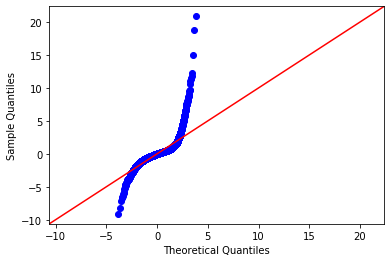

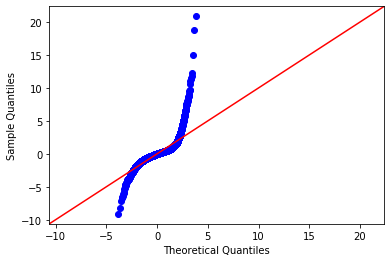

In [23]:
import statsmodels.api as sm
import scipy.stats as stats
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)